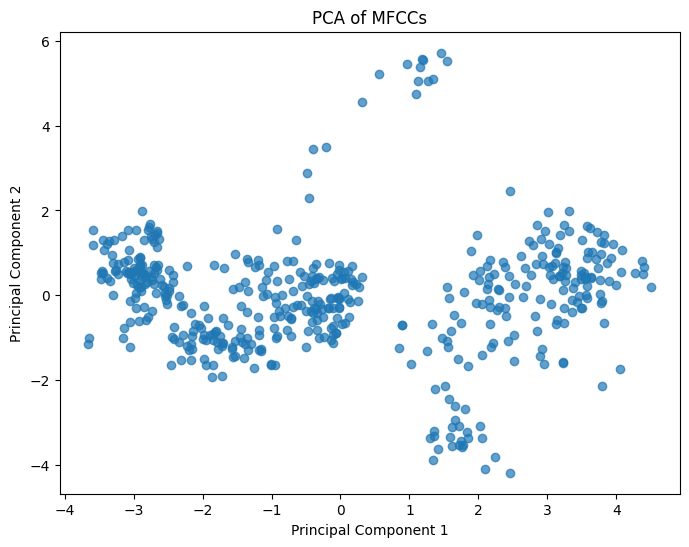

In [1]:
import librosa
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load audio file
audio, sr = librosa.load('/content/original.mpeg')

# Extract features
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

# Scale features
scaler = StandardScaler()
mfccs_scaled = scaler.fit_transform(mfccs.T)

# PCA for visualization
pca = PCA(n_components=2)
mfccs_pca = pca.fit_transform(mfccs_scaled)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(mfccs_pca[:,0], mfccs_pca[:,1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MFCCs')
plt.show()


# 1. Creating a Scalogram using Wavelet Transforms

<ipython-input-2-704ad93d3565>:13: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwtmatr = cwt(audio, ricker, widths)


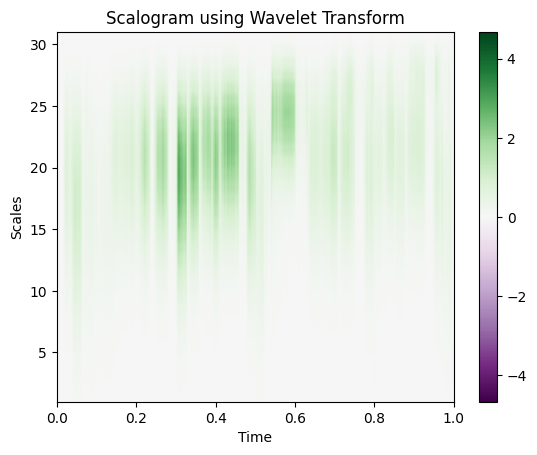

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy.signal import cwt, ricker

# Load an audio file
audio, sr = librosa.load('/content/original.mpeg', duration=5.0)  # Adjust the path and duration as needed

# Define wavelet widths
widths = np.arange(1, 31)

# Perform the Continuous Wavelet Transform (CWT)
cwtmatr = cwt(audio, ricker, widths)

# Plotting the scalogram
plt.imshow(np.abs(cwtmatr), extent=[0, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.title('Scalogram using Wavelet Transform')
plt.ylabel('Scales')
plt.xlabel('Time')
plt.colorbar()
plt.show()


# 2. Advanced Visualization Techniques for Audio Analysis

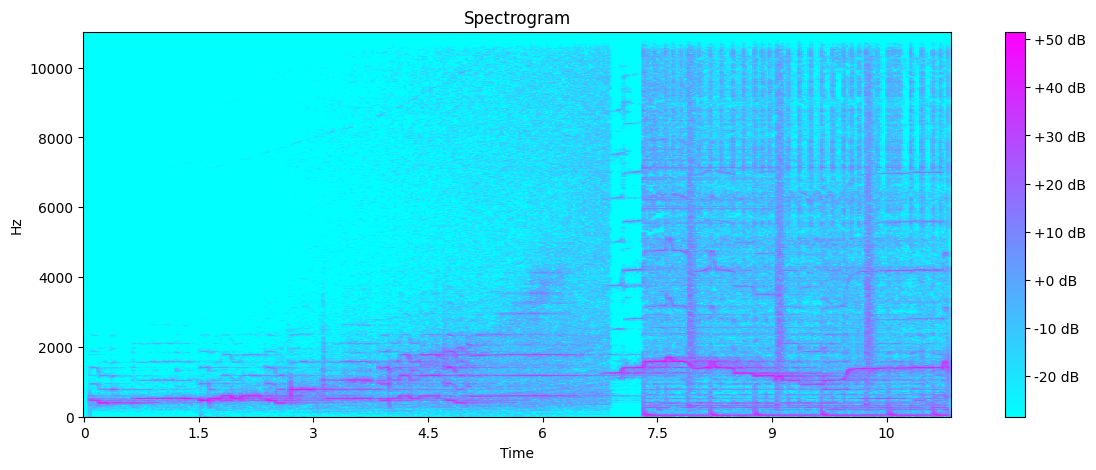

In [3]:
import librosa.display

# Load audio
audio, sr = librosa.load('/content/original.mpeg')

# Compute the Short-Time Fourier Transform (STFT)
X = librosa.stft(audio)

# Convert the magnitude to decibel units
Xdb = librosa.amplitude_to_db(abs(X))

# Plot the spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', cmap='cool')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


# 3. Feature Extraction for Genre Classification

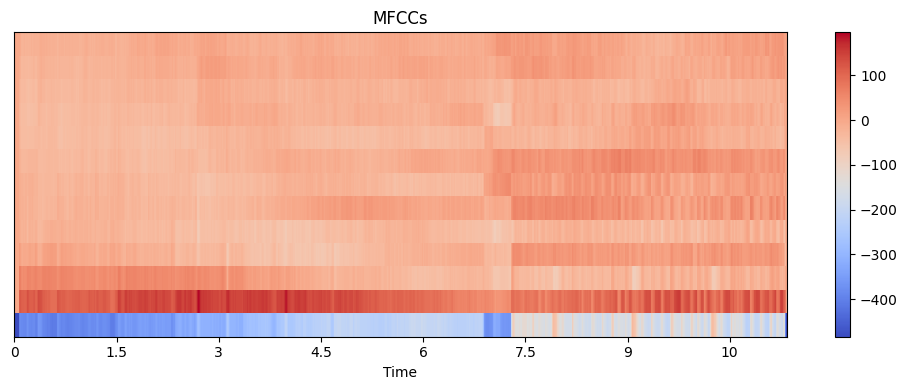

In [5]:
import librosa
import matplotlib.pyplot as plt
import librosa.display

# Load an audio file
audio_path = '/content/original.mpeg'  # Make sure to use the correct path to your audio file
audio, sr = librosa.load(audio_path, sr=None)  # Automatically uses the native sampling rate

# Extract MFCCs using keyword arguments
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

# Visualizing MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.tight_layout()
plt.show()


# 4. Practical Applications of Genre Visualization

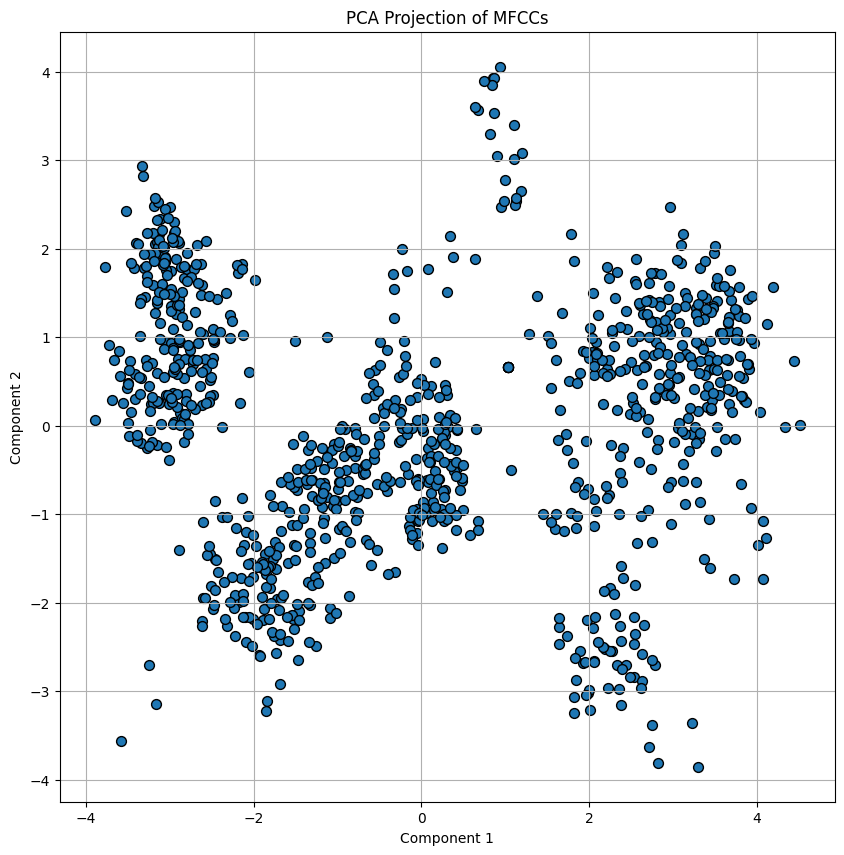

In [6]:
from sklearn.decomposition import PCA

# Assuming 'mfccs' is extracted as shown above
mfccs_scaled = StandardScaler().fit_transform(mfccs.T)

# Apply PCA
pca = PCA(n_components=2)
projected = pca.fit_transform(mfccs_scaled)

# Plot
plt.figure(figsize=(10, 10))
plt.scatter(projected[:, 0], projected[:, 1], edgecolor='k', s=50)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Projection of MFCCs')
plt.grid(True)
plt.show()


Let's delve into the practical implications and significance of the four processes I described: creating a scalogram using wavelet transforms, generating advanced audio visualizations (like spectrograms), extracting audio features for genre classification, and utilizing dimensionality reduction for genre visualization. Each of these processes serves specific purposes in audio analysis and engineering, enhancing our understanding and manipulation of sound.


**1. Scalogram using Wavelet Transforms Output Explanation:**

A scalogram provides a time-frequency representation of a signal, displaying how different frequency components evolve over time. The output is a visual plot where the x-axis represents time, the y-axis represents scales (or frequencies), and the color or intensity represents the amplitude of the wavelet coefficients.
Importance and Applications:

* Scalograms are used to analyze non-stationary signals where frequency components vary over time, such as in speech, music, and other natural sounds.
* In music production to detect rhythmic patterns, in speech analysis to understand prosody and intonation, and in environmental sound analysis to identify and classify natural sounds.
* Importance: They allow for the precise analysis of signals whose spectral properties change over time, providing critical insights that are not possible with traditional Fourier transforms.


**2. Advanced Visualization Techniques (Spectrogram) Output Explanation:**

A spectrogram is another time-frequency representation, but it uses Fourier transform methods to show how the intensity (power) of various frequencies varies over time. The output visualizes frequencies on the y-axis, time on the x-axis, and the energy or power of frequency components using color intensity.
Importance and Applications:

* To visually analyze the spectral density of signals. Spectrograms are crucial for identifying how sound spectra evolve in music, speech, and ambient sounds.
* In audio editing and engineering for enhancing recordings, in speech recognition technologies to improve accuracy, and in acoustic ecology to study environmental sounds.
* Importance: Spectrograms provide a detailed view of the signal’s spectral richness and time-evolving behavior, facilitating the identification of harmonics, noise, and other spectral characteristics crucial for audio processing.


**3. Feature Extraction for Genre Classification (MFCCs) Output Explanation:**

Mel Frequency Cepstral Coefficients (MFCCs) capture the timbral aspects of sound. They summarize the power spectrum of a signal based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.
Importance and Applications:

* MFCCs are effective for capturing the basic properties of sound, such as timbre, which are crucial for distinguishing between different musical genres or different speakers in speech analysis.
* In music information retrieval (MIR) for genre classification, in speech recognition to distinguish between different speakers, and in sound synthesis to model sound textures.
* Importance: MFCCs reduce the complexity of the signal without losing key spectral properties, making them highly efficient for training machine learning models in classification tasks.

**4. Dimensionality Reduction for Genre Visualization (PCA) Output Explanation:**

Principal Component Analysis (PCA) reduces the dimensionality of the feature space while attempting to preserve the variance (information) of the dataset. The output is a 2D or 3D scatter plot that highlights how instances (audio tracks) cluster based on their genre.
Importance and Applications:

* PCA is used to simplify the complexity in high-dimensional data (like MFCCs) to two or three principal components that can be easily visualized and analyzed.
* In exploratory data analysis to find patterns in music datasets, in machine learning to reduce overfitting by eliminating noisy or unnecessary features, and in user interfaces to visualize differences in music tracks based on their acoustic features.
* Importance: By reducing the dimensionality of data, PCA helps in visualizing and understanding the underlying structure of complex datasets, facilitating more informed decision-making in audio classification and other machine learning tasks.